<a href="https://colab.research.google.com/github/co1dtype/aifactory_AirPollution/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 대충 데이터 어떻게 생겨 먹었는지 확인하기

In [ ]:
import pandas as pd

train_1 = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TRAIN/공주.csv")
train_aws_1 = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TRAIN_AWS/공주.csv")

In [ ]:
train_1.head()

,연도,일시,측정소,PM2.5
0,0,01-01 00:00,공주,0.056
1,0,01-01 01:00,공주,0.060
2,0,01-01 02:00,공주,0.068
3,0,01-01 03:00,공주,0.060
4,0,01-01 04:00,공주,0.068


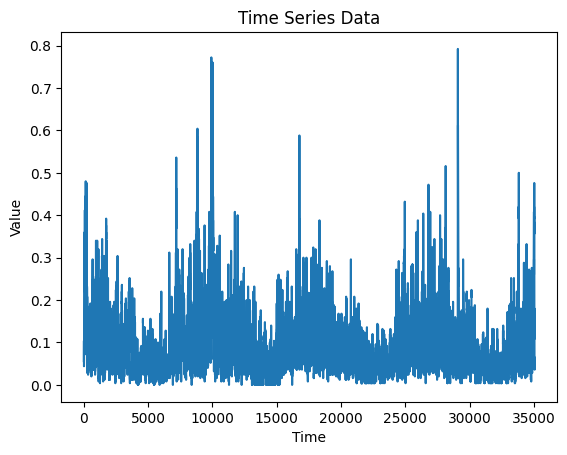

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 시각화
plt.plot(train_1['PM2.5'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

In [ ]:
train_1.head()

,연도,일시,측정소,PM2.5
0,0,01-01 00:00,공주,0.056
1,0,01-01 01:00,공주,0.060
2,0,01-01 02:00,공주,0.068
3,0,01-01 03:00,공주,0.060
4,0,01-01 04:00,공주,0.068


In [ ]:
train_aws_1.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,공주,0.173776,0.201944,0.023018,0.0,0.828
1,0,01-01 01:00,공주,0.176935,0.168611,0.030691,0.0,0.831
2,0,01-01 02:00,공주,0.180095,0.087222,0.033248,0.0,0.784
3,0,01-01 03:00,공주,0.178515,0.087222,0.025575,0.0,0.745
4,0,01-01 04:00,공주,0.164297,0.113889,0.020460,0.0,0.750


In [ ]:
meta_aws = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/META/awsmap.csv")
meta_pm = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/META/pmmap.csv")

In [ ]:
meta_aws.head(50)

,Location,Latitude,Longitude,Description
0,오월드,36.2913,127.3959,대전광역시 중구사정공원로 70 오월드 내 플라워랜드
1,세천,36.3402,127.4938,대전광역시 동구세천동 63-1
2,장동,36.4135,127.4382,대전광역시 대덕구장동 360-2
3,세종고운,36.5315,127.2406,세종특별자치시 고운동산 25번지
4,세종금남,36.4585,127.2688,세종특별자치시 시군구금남면 성덕리 77-3
5,세종연서,36.5667,127.2806,세종특별자치시 연서면봉암리 196-1
6,세종전의,36.6908,127.2005,세종특별자치시 전의면읍내리 5-1번지(전의생활체육공원)
7,북격렬비도,36.6254,125.5595,충청남도 태안군근흥면 가의도리산 27(북격렬비도)
8,호도,36.3012,126.2663,충청남도 보령시오천면 녹도리 388-5
9,대산,37.0106,126.3881,충청남도 서산시대산읍 대죽리산95-1 (5304부대 대산방공진지)


In [ ]:
meta_pm.head(50)

,Location,Latitude,Longitude,Description
0,아름동,36.512252,127.246789,세종특별자치시 보듬3로 114 아름동커뮤니티센터 옥상 (아름동)
1,신흥동,36.592887,127.292550,세종 조치원읍 군청로 87-16(신흥동) 세종특별자치시 조치원청사 옥상
2,노은동,36.368242,127.318498,대전 유성구 노은동로 87번길 89(노은1동 주민센터) 노은1동 주민센터 3층 옥상
3,문창동,36.317215,127.437825,대전 중구 보문로 20번길 38(문창동 주민센터) 문창동 주민센터
4,읍내동,36.372388,127.417714,대전 대덕구 대전로 1331번길 75(태아산업(주)) 태아산업(주)
5,정림동,36.304442,127.366742,대전 서구 정림동로 10(정림동 주민센터) 정림동 주민센터
6,공주,36.446951,127.119209,충남 공주시 봉황로 1 (공주시의회 옥상)
7,논산,36.199217,127.087021,충남 논산시 시민로 389 (취암/부창동 행정복지센터 2층 옥상)
8,대천2동,36.353148,126.589735,충남 보령시 중앙로 142-16 (대천2동 주민센터 옥상)
9,독곶리,36.987579,126.391672,충남 서산시 대산읍 평신1로(독곶리) 한국수자원공사 대산산업용수센터 저수동 옥상


In [ ]:
test_1 = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TEST_INPUT/공주.csv")
test_aws_1 = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TEST_AWS/공주.csv")

In [ ]:
test_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      7728 non-null   int64  
 1   일시      7728 non-null   object 
 2   측정소     7728 non-null   object 
 3   PM2.5   3120 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 241.6+ KB


In [ ]:
test_1.describe()

,연도,PM2.5
count,7728.0,3120.000000
mean,4.0,0.077226
std,0.0,0.059849
min,4.0,0.004000
25%,4.0,0.036000
50%,4.0,0.064000
75%,4.0,0.100000
max,4.0,0.396000


In [ ]:
test_1.head(100)

,연도,일시,측정소,PM2.5
0,4,01-01 00:00,공주,0.060
1,4,01-01 01:00,공주,0.064
2,4,01-01 02:00,공주,0.072
3,4,01-01 03:00,공주,0.064
4,4,01-01 04:00,공주,0.056
...,...,...,...,...
95,4,01-04 23:00,공주,NaN
96,4,01-05 00:00,공주,NaN
97,4,01-05 01:00,공주,NaN
98,4,01-05 02:00,공주,NaN


In [ ]:
test_aws_1.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,4,01-01 00:00,공주,0.244866,0.123333,0.038363,0.0,0.647
1,4,01-01 01:00,공주,0.232227,0.167778,0.033248,0.0,0.648
2,4,01-01 02:00,공주,0.206951,0.000000,0.002558,0.0,0.734
3,4,01-01 03:00,공주,0.199052,0.000000,0.002558,0.0,0.753
4,4,01-01 04:00,공주,0.189573,0.000000,0.002558,0.0,0.795


In [ ]:
answer_sample = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/answer_sample.csv")
answer_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78336 entries, 0 to 78335
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      78336 non-null  int64  
 1   일시      78336 non-null  object 
 2   측정소     78336 non-null  object 
 3   PM2.5   0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
print(answer_sample['측정소'].unique())

['공주' '노은동' '논산' '대천2동' '독곶리' '동문동' '모종동' '문창동' '성성동' '신방동' '신흥동' '아름동'
 '예산군' '읍내동' '이원면' '정림동' '홍성읍']


# 데이터 결측지 얼마나 많은지 관찰

In [ ]:
import os
train_list = os.listdir('/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TRAIN')
train_aws_list = os.listdir("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/TRAIN_AWS")
path = "/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset"

In [ ]:
data = []

for train in train_list:
    paths = path + "/TRAIN/" +  train
    tmp = pd.read_csv(paths)
    data.append(tmp)

    
    print(train, len(tmp))
    #print(tmp.info())
    print(tmp.isnull().sum())
    print("--" * 100)

대천2동.csv 35064
연도         0
일시         0
측정소        0
PM2.5    706
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
동문동.csv 35064
연도          0
일시          0
측정소         0
PM2.5    2455
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
독곶리.csv 35064
연도          0
일시          0
측정소         0
PM2.5    1031
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
노은동.csv 35064
연도         0
일시         0
측정소        0
PM2.5    924
dtype: int64
---------------------------------------------------

In [ ]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      35064 non-null  int64  
 1   일시      35064 non-null  object 
 2   측정소     35064 non-null  object 
 3   PM2.5   34358 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
data_aws = []

for train in train_aws_list:
    paths = path + "/TRAIN_AWS/" +  train
    tmp = pd.read_csv(paths)
    data_aws.append(tmp)

    tmp.interpolate()
    print(train, len(tmp))
    #print(tmp.info())
    print(tmp.isnull().sum())
    print("--" * 100)

논산.csv 35064
연도           0
일시           0
지점           0
기온(°C)     488
풍향(deg)    488
풍속(m/s)    488
강수량(mm)    488
습도(%)      488
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
계룡.csv 35064
연도            0
일시            0
지점            0
기온(°C)     1064
풍향(deg)    1064
풍속(m/s)    1064
강수량(mm)    1064
습도(%)      1064
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
공주.csv 35064
연도           0
일시           0
지점           0
기온(°C)     684
풍향(deg)    684
풍속(m/s)    684
강수량(mm)    684
습도(%)      684
dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------

# Meta data ananlysis

In [ ]:
meta_aws = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/META/awsmap.csv")
meta_pm = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/META/pmmap.csv")

In [ ]:
meta_aws

,Location,Latitude,Longitude,Description
0,오월드,36.2913,127.3959,대전광역시 중구사정공원로 70 오월드 내 플라워랜드
1,세천,36.3402,127.4938,대전광역시 동구세천동 63-1
2,장동,36.4135,127.4382,대전광역시 대덕구장동 360-2
3,세종고운,36.5315,127.2406,세종특별자치시 고운동산 25번지
4,세종금남,36.4585,127.2688,세종특별자치시 시군구금남면 성덕리 77-3
5,세종연서,36.5667,127.2806,세종특별자치시 연서면봉암리 196-1
6,세종전의,36.6908,127.2005,세종특별자치시 전의면읍내리 5-1번지(전의생활체육공원)
7,북격렬비도,36.6254,125.5595,충청남도 태안군근흥면 가의도리산 27(북격렬비도)
8,호도,36.3012,126.2663,충청남도 보령시오천면 녹도리 388-5
9,대산,37.0106,126.3881,충청남도 서산시대산읍 대죽리산95-1 (5304부대 대산방공진지)


In [ ]:
# AWS 측정소와 PM 측정소와 가까운 쌍 찾기 (L2 Distance, brute force)

import math
location = {}

for i in range(len(meta_pm)):
    A = meta_pm['Location'][i]
    x1, y1 = meta_pm['Latitude'][i], meta_pm['Longitude'][i]
    best = 99999999999999999
    B = ""

    for j in range(len(meta_aws)):
        x2, y2 = meta_aws['Latitude'][j], meta_aws['Longitude'][j]
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        if distance < best:
            B = meta_aws['Location'][j]
            best = distance
    
    location[A] = B


In [ ]:
location

{'아름동': '세종고운',
 '신흥동': '세종연서',
 '노은동': '계룡',
 '문창동': '오월드',
 '읍내동': '장동',
 '정림동': '오월드',
 '공주': '공주',
 '논산': '논산',
 '대천2동': '대천항',
 '독곶리': '대산',
 '동문동': '태안',
 '모종동': '아산',
 '신방동': '성거',
 '예산군': '예산',
 '이원면': '태안',
 '홍성읍': '홍북',
 '성성동': '성거'}

# Test Submit
단순 제출을 시도해야하는 경우 .csv 파일을 만들어주는 소스코드  
대회 규칙에 어긋나므로 이 코드를 수정해 다른 결과를 만들어낼 추론은 금지한다. 

Linear Regression은 공식에 의해 값이 동일하게 나옴. 

In [ ]:
location = ['공주', '노은동', '논산', '대천2동', '독곶리', '동문동', '모종동', '문창동', '성성동', '신방동',     '신흥동', '아름동',
 '예산군', '읍내동', '이원면', '정림동', '홍성읍']

In [ ]:
from tqdm.auto import tqdm
import pandas as pd

answer = []
path = "/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset"

for i in tqdm(location):
    paths = path + "/TEST_INPUT/" +  i + ".csv"
    df = pd.read_csv(paths)
    
    null_index = df.index[df.isnull().any(axis=1)]
    df = df.interpolate(method='linear')
    answer += [df['PM2.5'][i] for i in null_index]


answer_sample = pd.read_csv("/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/answer_sample.csv")
answer_sample['PM2.5'] = answer
answer_sample.to_csv('/content/drive/MyDrive/AIFactory/Air_pollution_forecasting/dataset/result.csv', encoding='utf-8', index=False)


  0%|          | 0/17 [00:00<?, ?it/s]

# Data Visualization and Data preprocessing

In [ ]:
PM = ['공주', '노은동', '논산', '대천2동', '독곶리', '동문동', '모종동', '문창동', '성성동', '신방동', '신흥동', '아름동',
 '예산군', '읍내동', '이원면', '정림동', '홍성읍']

PM2AWS = {'아름동': '세종고운',
 '신흥동': '세종연서',
 '노은동': '계룡',
 '문창동': '오월드',
 '읍내동': '장동',
 '정림동': '오월드',
 '공주': '공주',
 '논산': '논산',
 '대천2동': '대천항',
 '독곶리': '대산',
 '동문동': '태안',
 '모종동': '아산',
 '신방동': '성거',
 '예산군': '예산',
 '이원면': '태안',
 '홍성읍': '홍북',
 '성성동': '성거'}

In [ ]:
train_data = []

# 대회 규칙 상 AWS를 반드시 모델링에 활용해야 한다.
for pm in PM:
    